#  Corona vaccine progress 
version 0.90 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-06 11:48:31.848679


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2020-12-31,Government of Argentina,https://www.argentina.gob.ar/sites/default/fil...
1,Austria,AUT,Pfizer/BioNTech,2020-12-30,Federal Ministry for Social Affairs and Health,https://www.sozialministerium.at/Corona-Schutz...
2,Bahrain,BHR,Sinopharm,2021-01-05,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1346544...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-02,Government vaccination taskforce,https://www.lecho.be/dossiers/coronavirus/coro...
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-01,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-04,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-05,Department of Statistics and Health Information,https://deis.minsal.cl/
7,China,CHN,"CNBG, Sinovac",2020-12-31,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-03,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-05,Ministry of Health,https://vlada.gov.hr/vijesti/nece-biti-popusta...


## Latest reported

In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:25]

,location,date,vaccine,total_vaccinations,source_url,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
55,Croatia,2021-01-05,Pfizer/BioNTech,13798,https://vlada.gov.hr/vijesti/nece-biti-popusta...,HRV,Pfizer/BioNTech,2021-01-05,Ministry of Health,https://vlada.gov.hr/vijesti/nece-biti-popusta...,both
79,France,2021-01-05,Pfizer/BioNTech,5000,https://twitter.com/olivierveran/status/134652...,FRA,Pfizer/BioNTech,2021-01-05,Ministry of Health,https://twitter.com/olivierveran/status/134652...,both
174,Romania,2021-01-05,Pfizer/BioNTech,41609,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Pfizer/BioNTech,2021-01-05,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,both
75,Estonia,2021-01-05,Pfizer/BioNTech,3188,https://www.terviseamet.ee/et/uudised/covid-19...,EST,Pfizer/BioNTech,2021-01-05,National Health Board,https://www.terviseamet.ee/et/uudised,both
135,Latvia,2021-01-05,Pfizer/BioNTech,2923,https://twitter.com/VMNVD/status/1346426374010...,LVA,Pfizer/BioNTech,2021-01-05,National Health Service,https://twitter.com/VMNVD/status/1346426374010...,both
162,Poland,2021-01-05,Pfizer/BioNTech,92220,https://twitter.com/MZ_GOV_PL/status/134639602...,POL,Pfizer/BioNTech,2021-01-05,Ministry of Health,https://twitter.com/MZ_GOV_PL/status/134639602...,both
16,Bahrain,2021-01-05,Sinopharm,63893,https://twitter.com/MOH_Bahrain/status/1346544...,BHR,Sinopharm,2021-01-05,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1346544...,both
131,Italy,2021-01-05,Pfizer/BioNTech,182442,https://github.com/italia/covid19-opendata-vac...,ITA,Pfizer/BioNTech,2021-01-05,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,both
78,Finland,2021-01-05,Pfizer/BioNTech,5445,https://thl.fi/en/web/infectious-diseases-and-...,FIN,Pfizer/BioNTech,2021-01-05,Department of Health and Welfare,https://thl.fi/fi/web/infektiotaudit-ja-rokotu...,both
184,Spain,2021-01-05,Pfizer/BioNTech,139339,https://www.mscbs.gob.es/profesionales/saludPu...,ESP,Pfizer/BioNTech,2021-01-05,Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada                  22
Israel                  16
Bahrain                 14
Italy                   10
Germany                  9
United States            9
Denmark                  9
Romania                  8
Estonia                  8
Greece                   8
Poland                   7
Oman                     7
Hungary                  6
Chile                    6
Mexico                   6
Portugal                 4
Croatia                  3
Latvia                   3
Bulgaria                 3
Wales                    3
Scotland                 3
Russia                   3
Finland                  3
Northern Ireland         3
United Kingdom           2
Argentina                2
Spain                    2
England                  2
Costa Rica               2
Ireland                  2
China                    2
Belgium                  1
Iceland                  1
United Arab Emirates     1
Austria                  1
Malta                    1
Kuwait                   1
S

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                 
Argentina             Sputnik V                    2
Austria               Pfizer/BioNTech              1
Bahrain               Sinopharm                   14
Belgium               Pfizer/BioNTech              1
Bulgaria              Pfizer/BioNTech              3
Canada                Moderna, Pfizer/BioNTech     5
                      Pfizer/BioNTech             17
Chile                 Pfizer/BioNTech              6
China                 CNBG, Sinovac                2
Costa Rica            Pfizer/BioNTech              2
Croatia               Pfizer/BioNTech              3
Czechia               Pfizer/BioNTech              1
Denmark               Pfizer/BioNTech              9
England               Pfizer/BioNTech              2
Estonia               Pfizer/BioNTech              8
Finland               Pfizer/BioNTech              3
France                Pfizer/BioNTech              1
Germany               Pfizer/BioNTech              9

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 196
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               189 non-null    object        
 1   date                   189 non-null    datetime64[ns]
 2   vaccine                189 non-null    object        
 3   total_vaccinations     189 non-null    int64         
 4   source_url             189 non-null    object        
 5   iso_code               189 non-null    object        
 6   vaccines               189 non-null    object        
 7   last_observation_date  189 non-null    object        
 8   source_name            189 non-null    object        
 9   source_website         189 non-null    object        
 10  _merge                 189 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 16.5+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


14 556 552 (40, 3)


## Charts

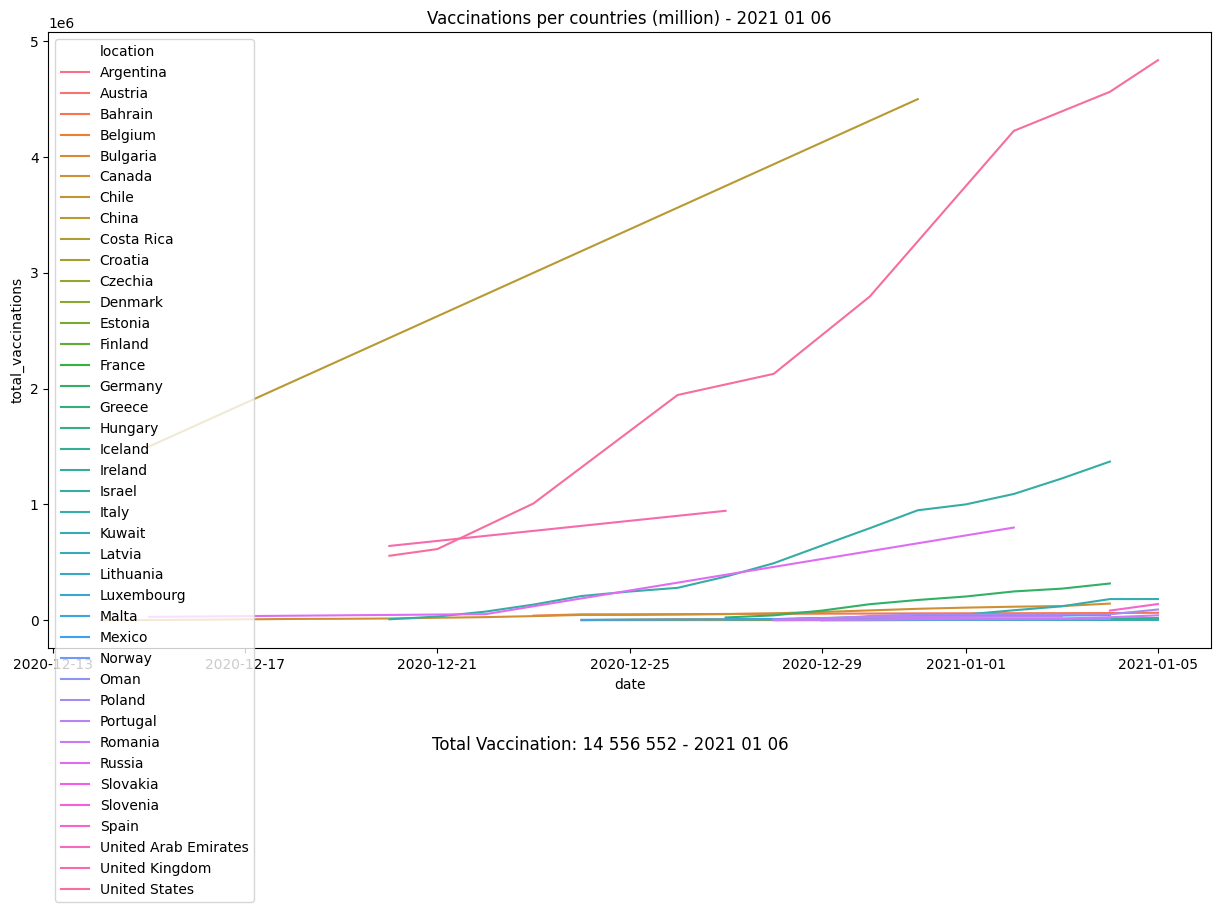

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [11]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 196
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               189 non-null    object        
 1   date                   189 non-null    datetime64[ns]
 2   vaccine                189 non-null    object        
 3   total_vaccinations     189 non-null    int64         
 4   source_url             189 non-null    object        
 5   iso_code               189 non-null    object        
 6   vaccines               189 non-null    object        
 7   last_observation_date  189 non-null    object        
 8   source_name            189 non-null    object        
 9   source_website         189 non-null    object        
 10  _merge                 189 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 16.5+ KB


In [12]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


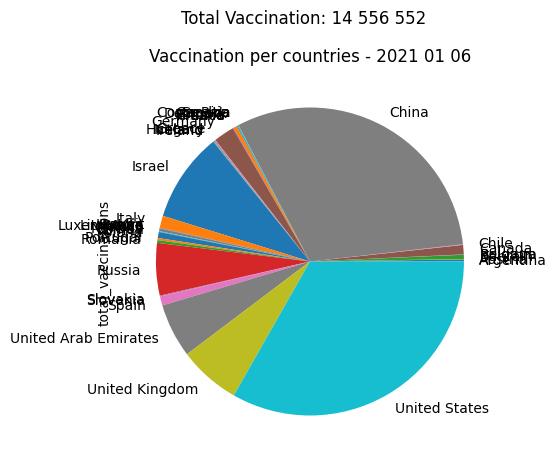

In [13]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [14]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,4836469,"Moderna, Pfizer/BioNTech",USA
China,4500000,"CNBG, Sinovac",CHN
Israel,1370000,Pfizer/BioNTech,ISR
United Kingdom,944539,Pfizer/BioNTech,GBR
United Arab Emirates,826301,Sinopharm,ARE
Russia,800000,Sputnik V,RUS
Germany,316962,Pfizer/BioNTech,DEU
Italy,182442,Pfizer/BioNTech,ITA
Canada,143250,"Moderna, Pfizer/BioNTech",CAN


In [15]:
plotLatestCountries.shape

(40, 3)

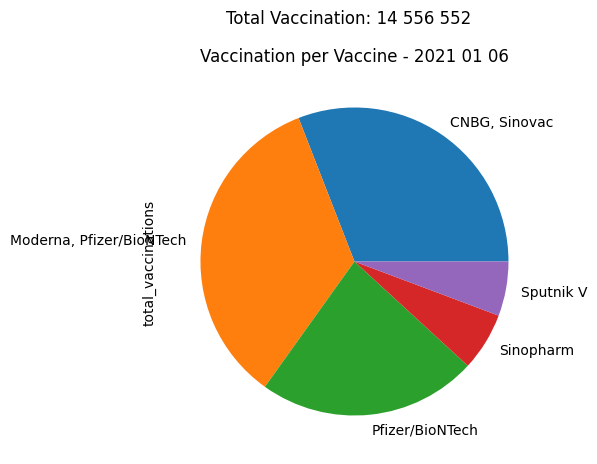

In [16]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [17]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                    832013
Sinopharm                    890194
Pfizer/BioNTech             3354626
CNBG, Sinovac               4500000
Moderna, Pfizer/BioNTech    4979719
Name: total_vaccinations, dtype: int64

In [18]:
# Sweden have 10 000 doses....
#allCountries

In [19]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-06 11:48:39.296066
Time elapsed (hh:mm:ss.ms) 0:00:07.447711


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [20]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [21]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
139,http://www.wikidata.org/entity/Q760,North America,false,Saint Lucia,Q760,178844,LCA,9715,false,false,male
118,http://www.wikidata.org/entity/Q32,Europe,true,Luxembourg,Q32,626108,LUX,101449.97,false,false,male
31,http://www.wikidata.org/entity/Q183,Europe,true,Germany,Q183,83149300,DEU,44665,true,true,female
89,http://www.wikidata.org/entity/Q912,Africa,false,Mali,Q912,18541980,MLI,827,false,false,male
142,http://www.wikidata.org/entity/Q252,Asia,false,Indonesia,Q252,270625568,IDN,3846,true,false,male


In [22]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,32013,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,63893,Sinopharm,BHR
Belgium,700,Pfizer/BioNTech,BEL
Bulgaria,4739,Pfizer/BioNTech,BGR
Canada,143250,"Moderna, Pfizer/BioNTech",CAN
Chile,9254,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,2455,Pfizer/BioNTech,CRI


In [23]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,32013,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,63893,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,700,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,4739,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,143250,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,9254,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,2455,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,13798,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [24]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   40 non-null     int64   
 1   vaccine              40 non-null     object  
 2   iso_code             40 non-null     object  
 3   cid                  40 non-null     object  
 4   continent            40 non-null     object  
 5   memberEU             40 non-null     int64   
 6   country              40 non-null     object  
 7   qid                  40 non-null     object  
 8   population           40 non-null     int64   
 9   ISO3166_1            40 non-null     object  
 10  nominalGDPperCapita  40 non-null     float64 
 11  G20                  40 non-null     int64   
 12  IMF                  40 non-null     int64   
 13  genderH              40 non-null     object  
 14  _merge               40 non-null     category
 15  genderFlag           40 n

In [25]:
#CountriesData

In [26]:
CountriesData['Country'] = CountriesData.index

In [27]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.384068
population                         0.785789
nominalGDPperCapita                0.055264
G20                                0.456651
IMF                               -0.045980
genderFlag                         0.122088
Country                            0.168050
vaccinations_population_percent    0.220498
Name: total_vaccinations, dtype: float64

In [28]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.220498
memberEU                          -0.348391
population                        -0.047169
nominalGDPperCapita                0.122428
G20                               -0.104111
IMF                               -0.070959
genderFlag                         0.078693
Country                            0.113905
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [29]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


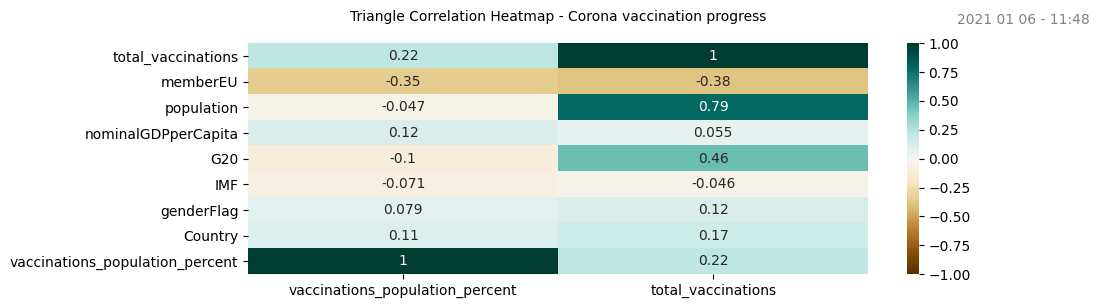

In [30]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [31]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,population,memberEU,continent,IMF,country,total_vaccinations,vaccinations_population_percent,G20
20,9093000,0,Asia,0,Israel,1370000,15.066535,0
37,9400145,0,Asia,0,United Arab Emirates,826301,8.790301,0
2,1492584,0,Asia,0,Bahrain,63893,4.280697,0
39,328239523,0,North America,0,United States of America,4836469,1.473457,1
38,66022273,0,Europe,0,United Kingdom,944539,1.430637,1
18,357050,0,Europe,0,Iceland,4875,1.365355,0
11,5827463,1,Europe,0,Denmark,51512,0.883952,0
33,146804372,0,Europe,0,Russia,800000,0.544943,1
15,83149300,1,Europe,1,Germany,316962,0.381196,1
5,37894799,0,North America,0,Canada,143250,0.378020,1


## Vaccination numbers % of population

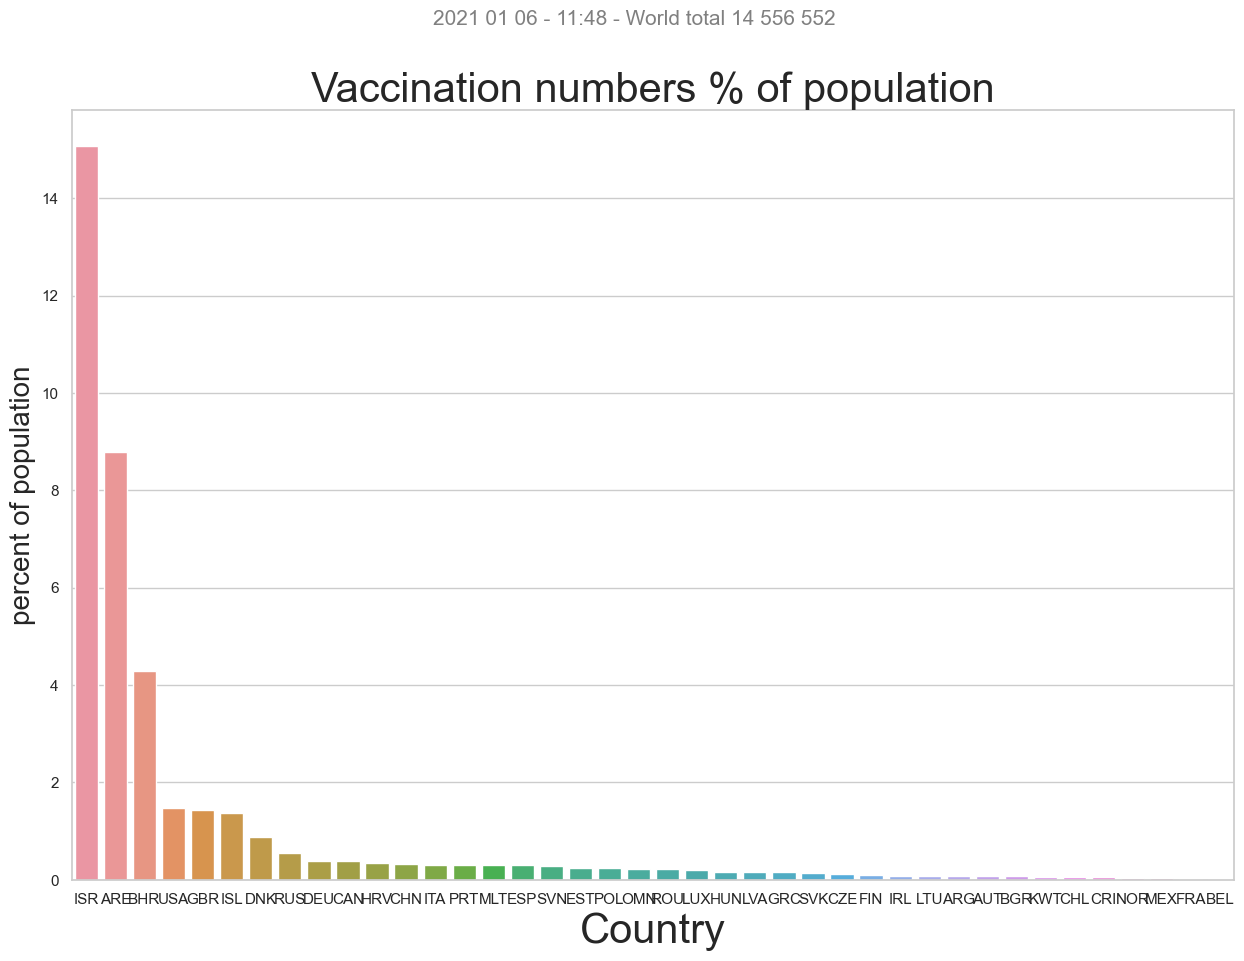

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

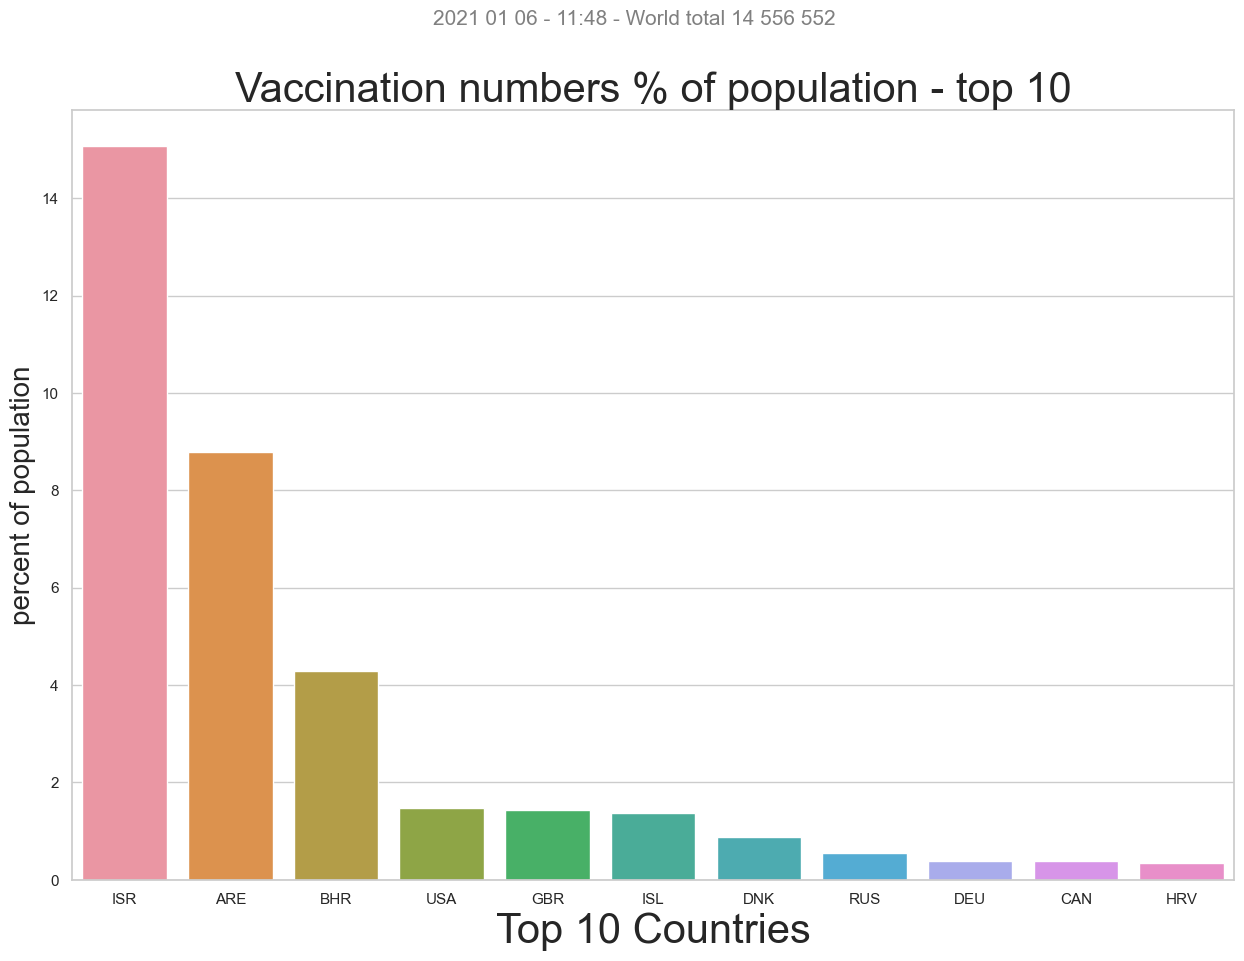

In [33]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

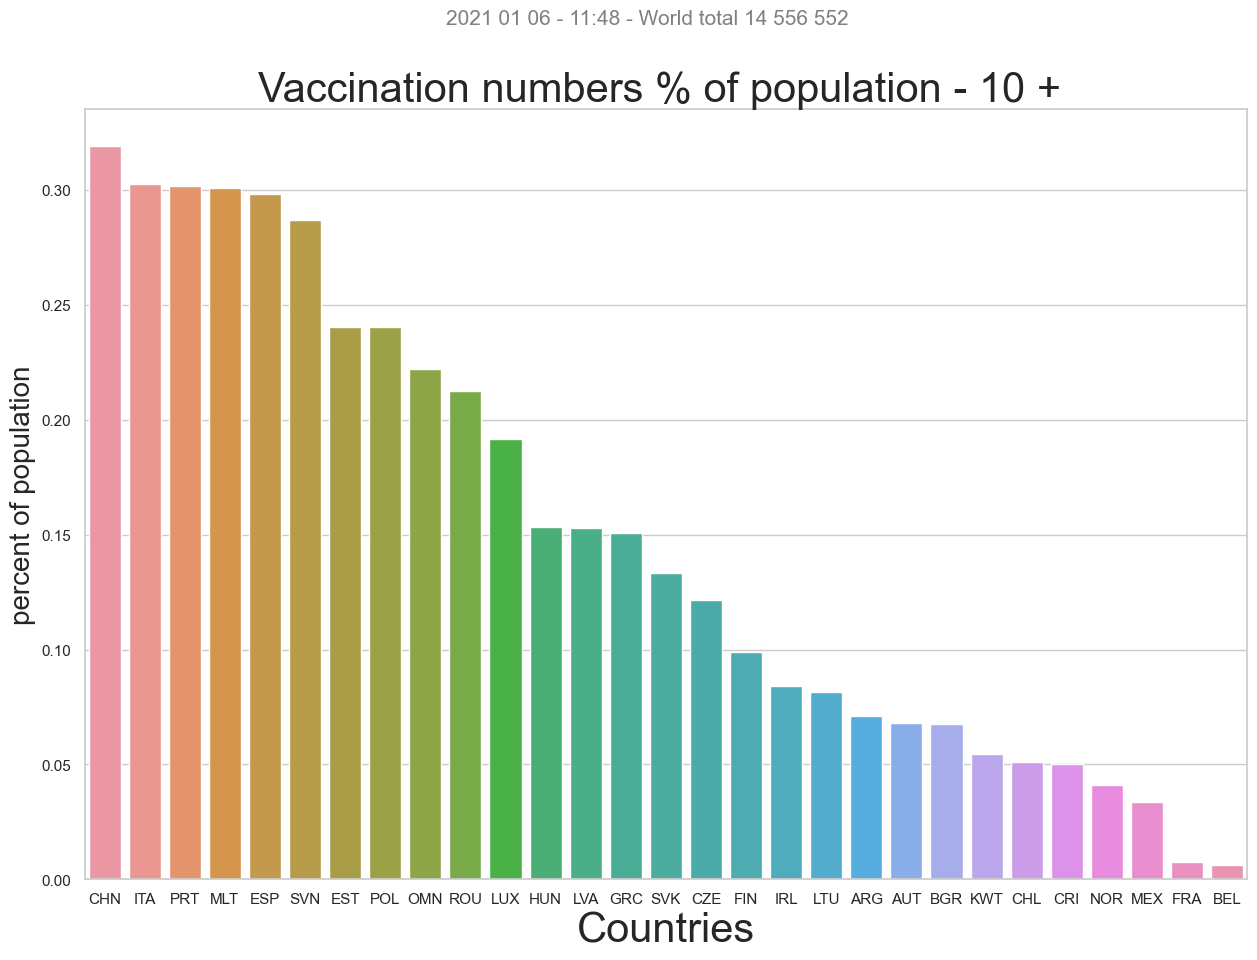

In [34]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

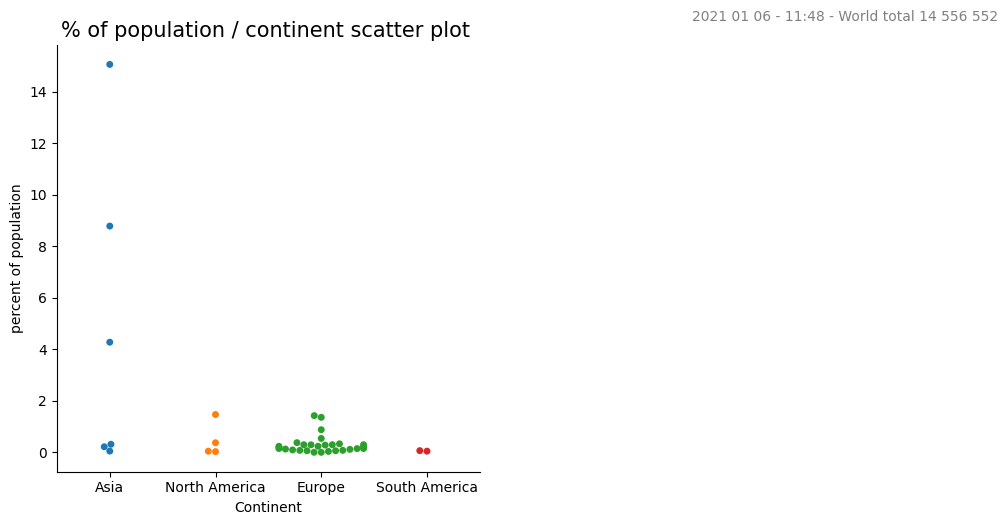

In [35]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

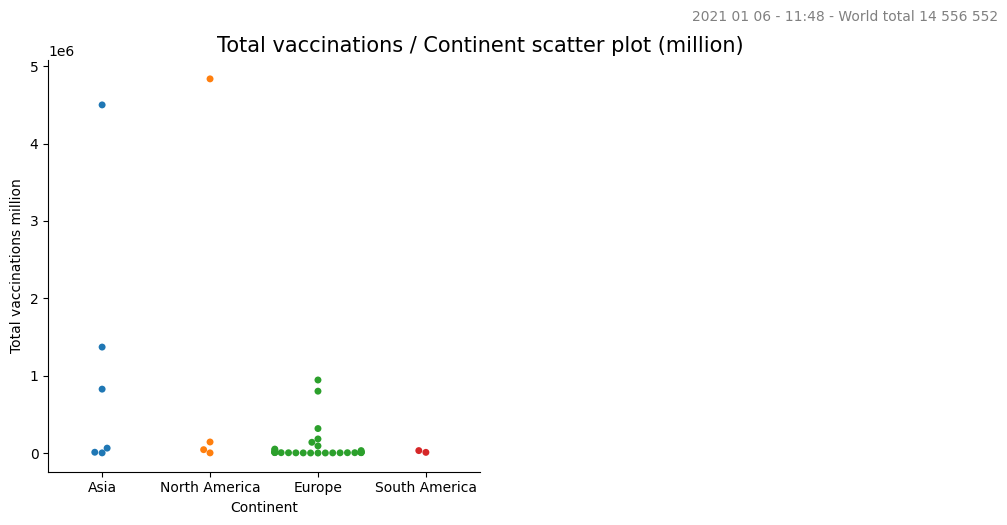

In [36]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [37]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

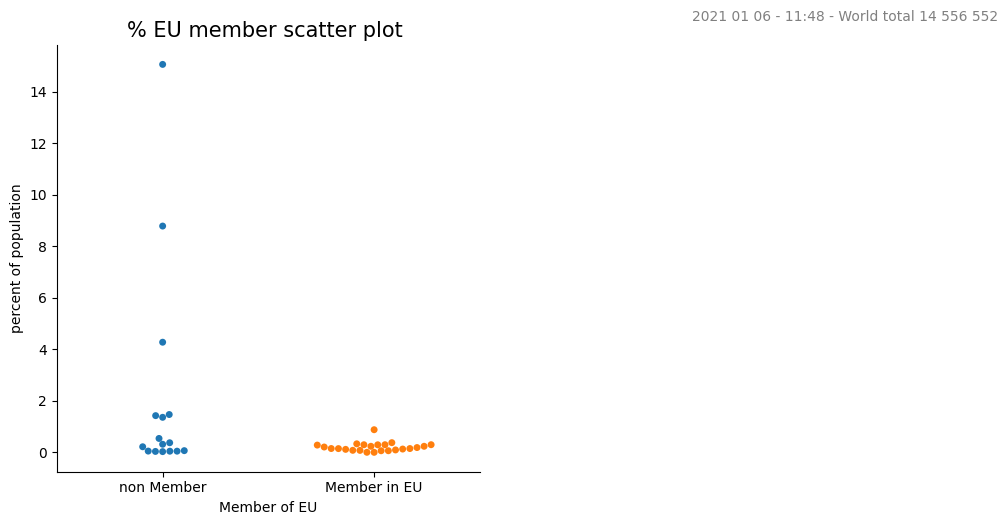

In [38]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

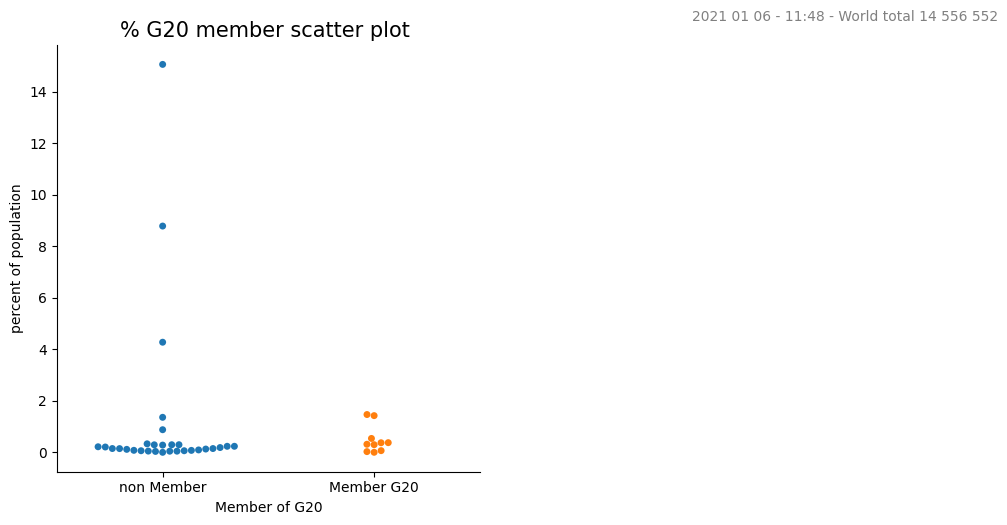

In [39]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

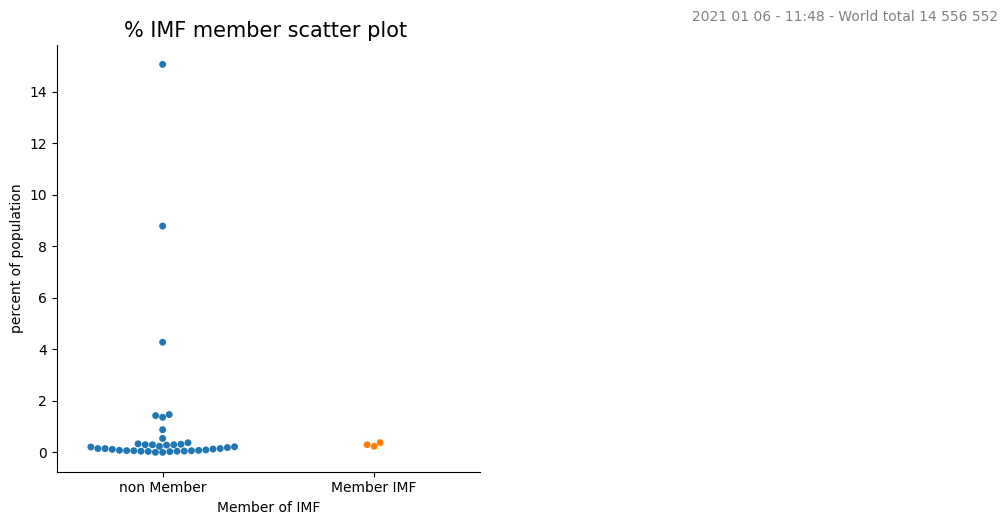

In [40]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [41]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


14 556 552 (40, 3) 2 715 729


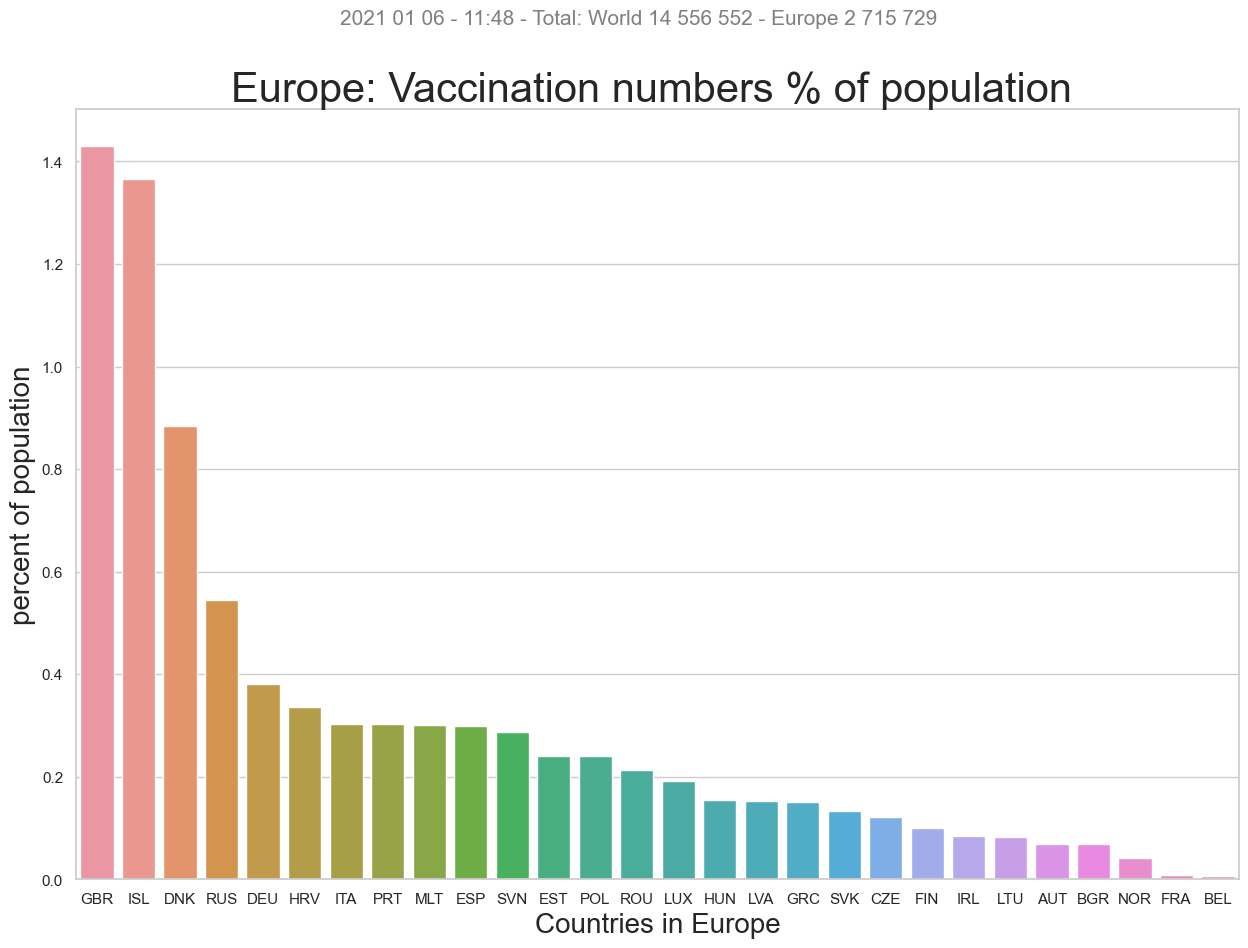

In [42]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [43]:
#CountriesDataEurope

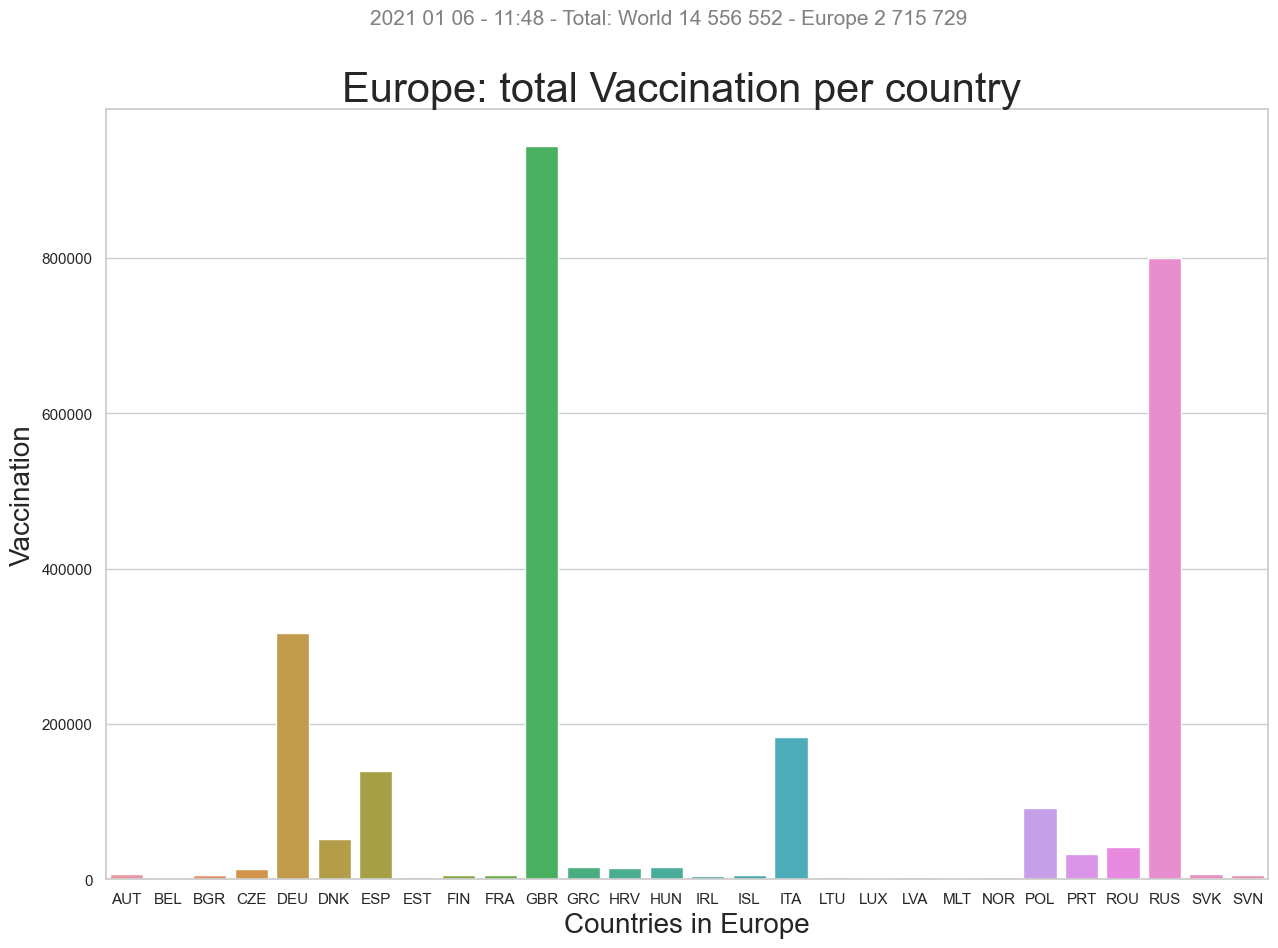

In [44]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [45]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,head_gender,memberEU,total_vaccinations,ISO3166_1,vaccinations_population_percent,country_x
13,male,non Member,0.0,ALB,0.000000,Albania
37,male,non Member,0.0,AND,0.000000,Andorra
2,male,non Member,0.0,ARM,0.000000,Armenia
35,male,Member in EU,6000.0,AUT,0.068111,Austria
6,male,non Member,0.0,AZE,0.000000,Azerbaijan
1,male,Member in EU,700.0,BEL,0.006123,Belgium
49,male,Member in EU,4739.0,BGR,0.067700,Bulgaria
9,male,non Member,0.0,BIH,0.000000,Bosnia and Herzegovina
16,male,non Member,0.0,BLR,0.000000,Belarus
30,male,non Member,0.0,CHE,0.000000,Switzerland


## All countries on continent Europe

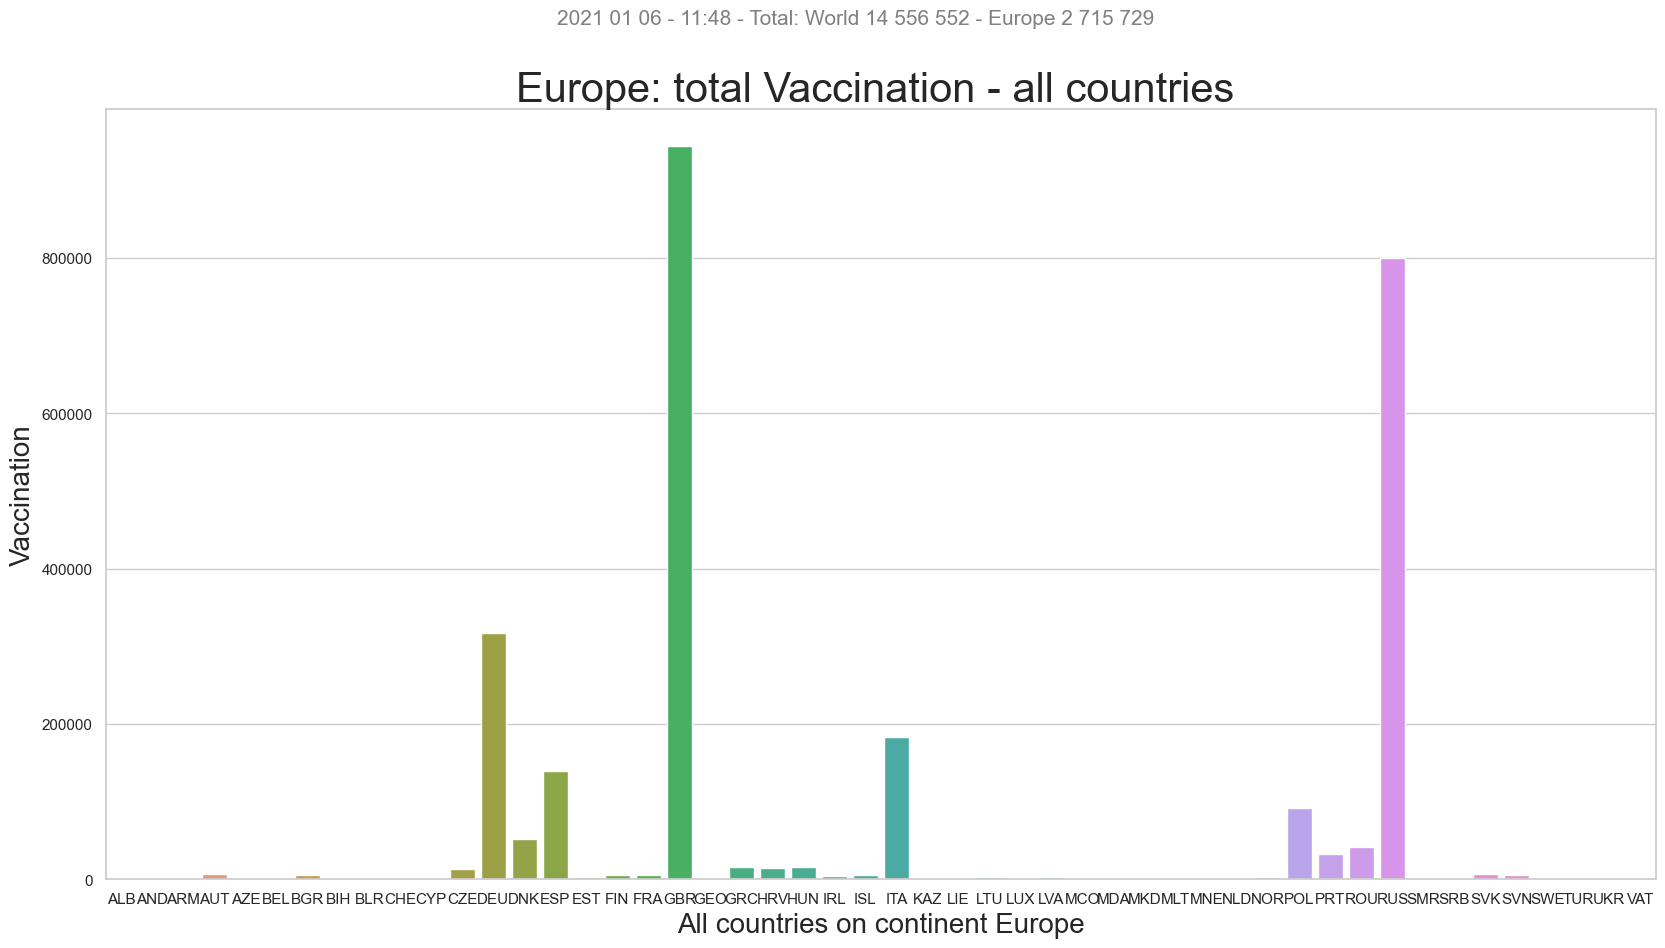

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [47]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   head_gender                      50 non-null     object 
 1   memberEU                         50 non-null     object 
 2   total_vaccinations               50 non-null     float64
 3   ISO3166_1                        50 non-null     object 
 4   vaccinations_population_percent  50 non-null     float64
 5   country_x                        50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


### Countries in EU not delivering Vaccination statistics

In [48]:
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,memberEU,country,total_vaccinations,ISO3166-1
14,Member in EU,Cyprus,0.0,CYP
28,Member in EU,Kingdom of the Netherlands,0.0,NLD
18,Member in EU,Sweden,0.0,SWE


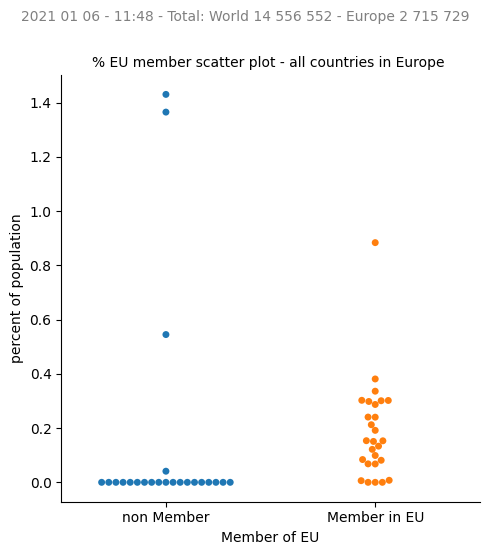

In [49]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [50]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   head_gender                      50 non-null     object 
 1   memberEU                         50 non-null     object 
 2   total_vaccinations               50 non-null     float64
 3   ISO3166-1                        50 non-null     object 
 4   vaccinations_population_percent  50 non-null     float64
 5   country                          50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [51]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

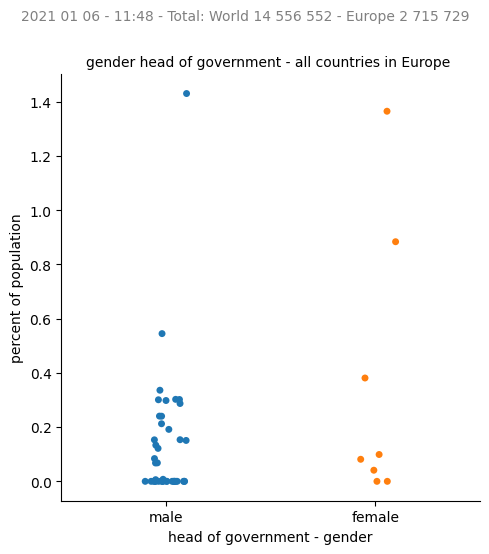

In [52]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

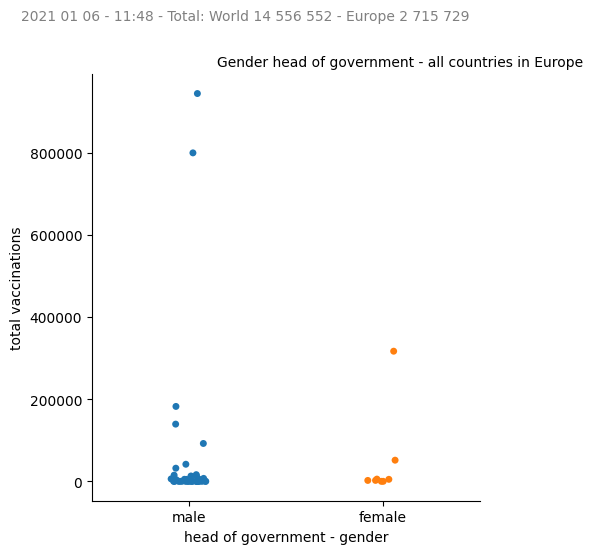

In [53]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [54]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

14 556 552 (40, 3) 2 715 729 (28, 21)


In [55]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-06 11:49:02.933621
Time elapsed (hh:mm:ss.ms) 0:00:31.085366


In [56]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)